In [2]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])

In [4]:
print(neural_dat.shape)

(2880, 83205)


In [6]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=100,assign_labels="discretize",random_state=0,affinity='precomputed').fit(neural_dat)

ValueError: array must be 2-dimensional and square. shape = (2880, 83205)

In [23]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(X.shape,Y.shape,Z.shape)

(40, 40) (40, 40) (40, 40)


In [33]:
random=np.random.choice(83025,1000,replace=False)
print(random.shape)

(1000,)


(1000, 2880)
(1000, 2880)


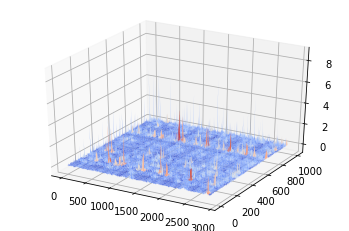

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs,ys=np.meshgrid(np.arange(2880),np.arange(1000))
print(xs.shape)
print(ys.shape)
from matplotlib import cm
ax.plot_surface(X=xs,Y=ys,Z=neural_dat[:,random].T,cmap=cm.coolwarm)

In [42]:
dat=neural_dat[:,random]
X=dat.T@dat
print(X.shape)

(1000, 1000)


In [43]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=10,assign_labels="discretize",random_state=0,affinity='precomputed').fit(X)


In [45]:
cl_lab=clustering.labels_

In [46]:
print(cl_lab)

[5 2 7 4 7 7 7 5 1 7 7 0 5 2 7 7 4 1 7 1 5 7 1 1 2 9 7 3 7 2 5 3 9 6 7 3 0
 3 3 3 5 7 6 5 7 1 7 2 7 2 7 4 6 7 7 7 7 7 1 6 4 7 1 0 1 7 6 9 7 3 7 6 5 2
 2 7 7 7 7 7 1 7 2 2 2 7 7 6 2 4 7 5 1 8 7 6 7 4 3 2 6 5 7 9 5 7 5 2 7 5 0
 6 5 0 6 5 7 3 7 2 0 1 4 0 6 7 7 1 7 7 4 2 2 4 4 7 1 3 7 2 2 5 5 7 2 7 3 6
 6 2 2 2 7 3 5 7 7 7 7 2 4 7 5 7 2 1 3 3 7 2 4 8 2 2 5 7 7 1 7 1 0 3 4 1 9
 7 7 6 0 0 4 7 7 7 2 7 5 3 7 4 4 1 7 5 7 2 7 7 7 7 3 7 1 5 1 2 0 2 7 7 2 5
 4 1 5 7 4 2 8 7 7 5 0 6 7 2 7 5 1 5 2 7 7 2 5 7 7 7 4 7 2 2 9 7 2 2 7 7 2
 1 7 7 2 2 5 8 5 2 7 7 7 9 7 8 7 4 3 1 3 7 7 0 9 6 4 0 4 5 7 5 3 3 2 1 7 4
 0 2 7 2 7 2 7 0 8 3 7 1 7 5 7 4 3 2 2 6 0 0 2 2 3 2 8 7 7 7 4 2 5 2 6 3 7
 8 2 1 9 1 2 4 1 2 7 7 0 7 2 5 1 5 7 2 2 7 5 4 3 6 7 0 0 4 2 7 2 8 7 0 6 7
 9 7 2 4 2 7 7 7 4 9 5 2 4 5 7 3 4 2 6 6 7 3 2 7 1 7 7 6 7 5 2 7 7 0 2 7 0
 2 0 7 3 7 0 2 6 1 5 2 3 7 2 7 1 4 3 7 7 9 2 0 6 9 7 0 7 6 4 7 3 8 7 9 7 1
 7 3 9 7 2 2 7 7 1 5 8 6 7 7 7 8 7 5 7 6 7 5 2 2 1 2 6 7 9 1 7 7 0 7 2 2 8
 3 7 4 4 7 7 3 2 5 7 2 4 

In [54]:
resorted_data=np.zeros((2880,1))
for j in range(0,10):
    res=dat[:,clustering.labels_==j]
    print(res.shape)
    resorted_data=np.hstack((resorted_data,dat[:,clustering.labels_==j]))
resorted_data=resorted_data[:,1:]
print(resorted_data.shape)

(2880, 56)
(2880, 77)
(2880, 153)
(2880, 62)
(2880, 71)
(2880, 97)
(2880, 81)
(2880, 344)
(2880, 23)
(2880, 36)
(2880, 1000)


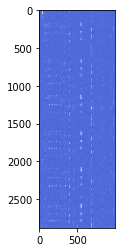

In [56]:
plt.imshow(resorted_data,cmap=cm.coolwarm)

(1000, 2880)
(1000, 2880)


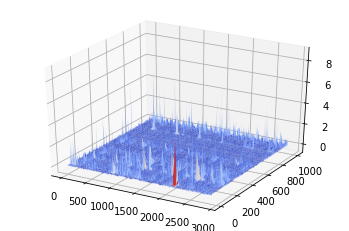

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs,ys=np.meshgrid(np.arange(2880),np.arange(1000))
print(xs.shape)
print(ys.shape)
from matplotlib import cm
ax.plot_surface(X=xs,Y=ys,Z=resorted_data.T,cmap=cm.coolwarm)

(array([ 56.,  77., 153.,  62.,  71.,  97.,  81., 344.,  23.,  36.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

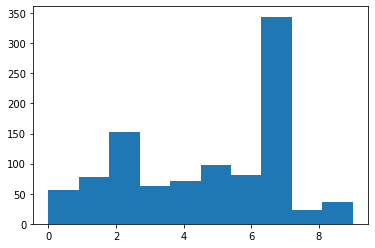

In [59]:
plt.hist(clustering.labels_)

# 2D Fourier transform

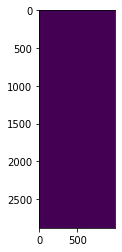

In [60]:
from scipy import fftpack, ndimage

fft2 = fftpack.fft2(resorted_data)

plt.imshow(abs(fft2))
plt.show()


In [66]:
fft_pr=fft2.copy()
fft_pr[0,0]=0

In [64]:
print(np.abs(fft2).shape)

(2880, 1000)


(1000, 2880)
(1000, 2880)


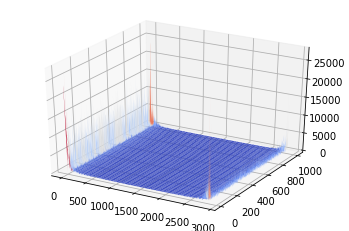

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs,ys=np.meshgrid(np.arange(2880),np.arange(1000))
print(xs.shape)
print(ys.shape)
from matplotlib import cm
ax.plot_surface(X=xs,Y=ys,Z=abs(fft_pr).T,cmap=cm.coolwarm)